<table class="table table-bordered">
<tr>
<th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Distributed Data Pipelines</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

Learning Objectives:
- Design PySpark Based Machine Learning
- Execute PySpark Syntax Correctly
- Evaluate and Select Final Model based on Metrics

You will be **graded on the use of PySpark**, so usage of **Pandas itself should be avoided as much as possible**, especially if a particular native method or function is already available in PySpark. **Penalties will be imposed in such cases.**

### Table of Contents
1. [Problem Statement Formulation](#1-0)
   - [Load Data](#1-1)
   - [Data Exploration](#1-2)
   - [Problem Statement](#1-3)

2. [Exploratory Data Analysis and Data Cleaning](#2-0)
   - [Grouping and Filtering](#2-1)
   - [Drop Unnecessary Columns](#2-2)
   - [Missing Value Treatment](#2-3)

3. [Data Wrangling and Transformation](#3-0)
   - [Categorical Data Encoding](#3-1)
   - [Train test Split](#3-2)
   - [Numerical Data Transformation](#3-3)
   - [Feature Scaling](#3-4)

4. [Machine Learning Modelling](#4-0)

5. [Model Evaluation and Selection](#5-0)

6. [Report](#6-0)


In [1]:
from pyspark.sql import SparkSession

import matplotlib.pyplot as plt

spark = SparkSession.builder.appName('assignment').getOrCreate()

your 131072x1 screen size is bogus. expect trouble
24/12/14 23:50:47 WARN Utils: Your hostname, marissa resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
24/12/14 23:50:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/14 23:50:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
import pyspark
print(pyspark.__version__)

3.5.3


In [3]:
from pyspark.sql.functions import desc

#### Step 1: Problem Statement Formulation

- Load the data from the CSV
- Explore the data, understand the data & prepare a problem statement to justify how your model could provide value to an organization/individuals

#### 1.1 Load Data

In [4]:
# load and explore data

data_df = spark.read.option("header", True) \
    .option("inferSchema", True) \
    .option("quote", '"') \
    .option("escape", '"') \
    .option("multiline", True)\
    .csv('./ASG1_vietnamese_tiki_products_mod.csv')

In [5]:
# Show top 20 rows in Dataframe

data_df.show(truncate=False)

+---------+-------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+-----+----------------+------+------------+--------------+---------------+---------+-----------------------------+------------+----------------+------------+---------+-------------------+-------------+
|id       |name                                                                                                               |description                                                                                                                                                                                                      |original_price|price|fulfillment_type|brand |review_count|rating_average|favourite_count|pay_later|current_se

#### 1.2 Data Exploration

In [6]:
(data_df.count(), len(data_df.columns))

(44804, 18)

In [7]:
# Show Scheme of Dataframe
# Showcases the data type and indicate if column allows null
data_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- description: string (nullable = true)
 |-- original_price: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- fulfillment_type: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- review_count: integer (nullable = true)
 |-- rating_average: double (nullable = true)
 |-- favourite_count: integer (nullable = true)
 |-- pay_later: boolean (nullable = true)
 |-- current_seller: string (nullable = true)
 |-- date_created: integer (nullable = true)
 |-- number_of_images: integer (nullable = true)
 |-- vnd_cashback: integer (nullable = true)
 |-- has_video: boolean (nullable = true)
 |-- product_type: string (nullable = true)
 |-- quantity_sold: integer (nullable = true)



In [8]:
data_df = data_df.withColumn("pay_later",
                             data_df["pay_later"]
                             .cast('string'))

data_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- description: string (nullable = true)
 |-- original_price: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- fulfillment_type: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- review_count: integer (nullable = true)
 |-- rating_average: double (nullable = true)
 |-- favourite_count: integer (nullable = true)
 |-- pay_later: string (nullable = true)
 |-- current_seller: string (nullable = true)
 |-- date_created: integer (nullable = true)
 |-- number_of_images: integer (nullable = true)
 |-- vnd_cashback: integer (nullable = true)
 |-- has_video: boolean (nullable = true)
 |-- product_type: string (nullable = true)
 |-- quantity_sold: integer (nullable = true)



In [9]:
data_df = data_df.withColumn("has_video",
                             data_df["has_video"]
                             .cast('string'))

data_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- description: string (nullable = true)
 |-- original_price: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- fulfillment_type: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- review_count: integer (nullable = true)
 |-- rating_average: double (nullable = true)
 |-- favourite_count: integer (nullable = true)
 |-- pay_later: string (nullable = true)
 |-- current_seller: string (nullable = true)
 |-- date_created: integer (nullable = true)
 |-- number_of_images: integer (nullable = true)
 |-- vnd_cashback: integer (nullable = true)
 |-- has_video: string (nullable = true)
 |-- product_type: string (nullable = true)
 |-- quantity_sold: integer (nullable = true)



In [10]:
# Shows Count, Mean, Standard Deviation, Minimum, Maximum of each column
# Analyse the Statistical Properties

data_df.describe().show()

24/12/14 23:50:52 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-------------------+--------------------+--------------------+-----------------+------------------+----------------+----------+------------------+------------------+---------------+---------+------------------+-----------------+------------------+------------------+---------+-------------------+------------------+
|summary|                 id|                name|         description|   original_price|             price|fulfillment_type|     brand|      review_count|    rating_average|favourite_count|pay_later|    current_seller|     date_created|  number_of_images|      vnd_cashback|has_video|       product_type|     quantity_sold|
+-------+-------------------+--------------------+--------------------+-----------------+------------------+----------------+----------+------------------+------------------+---------------+---------+------------------+-----------------+------------------+------------------+---------+-------------------+------------------+
|  count|              44

In [11]:
# Check the count of the dataframe 
# 44,804 rows & 18 columns
# Rating Average has null values 

print(f"Rows: {data_df.count()}, Columns: {len(data_df.columns)}")

for col in data_df.columns:
    non_null_count = data_df.select(col).where(data_df[col].isNotNull()).count()
    print(f"{col}: {non_null_count}")

Rows: 44804, Columns: 18
id: 44804
name: 44804
description: 44804
original_price: 44804
price: 44804
fulfillment_type: 44804
brand: 44804
review_count: 44804
rating_average: 44794
favourite_count: 44804
pay_later: 44804
current_seller: 44804
date_created: 44804
number_of_images: 44804
vnd_cashback: 44804
has_video: 44804
product_type: 44804
quantity_sold: 44804


In [12]:
columns = ['fulfillment_type', 'favourite_count', 'pay_later', 'has_video', 'product_type']

In [13]:
# Loop through each column in the list of columns

for col in columns:
    # Showcase the distinct unique values and its count of occurence
    grouped_count_df = data_df.groupBy(col).count().orderBy(desc("count"))

    # Show the grouped data with counts, without truncating
    print(f"Counts of unique values in column '{col}':")
    grouped_count_df.show(truncate=False)


Counts of unique values in column 'fulfillment_type':
+----------------+-----+
|fulfillment_type|count|
+----------------+-----+
|dropship        |43863|
|tiki_delivery   |703  |
|seller_delivery |238  |
+----------------+-----+

Counts of unique values in column 'favourite_count':
+---------------+-----+
|favourite_count|count|
+---------------+-----+
|0              |44804|
+---------------+-----+

Counts of unique values in column 'pay_later':
+---------+-----+
|pay_later|count|
+---------+-----+
|false    |24457|
|true     |20347|
+---------+-----+

Counts of unique values in column 'has_video':
+---------+-----+
|has_video|count|
+---------+-----+
|false    |40276|
|true     |4528 |
+---------+-----+

Counts of unique values in column 'product_type':
+-------------------+-----+
|product_type       |count|
+-------------------+-----+
|fashion_accessories|15283|
|women_shoes        |7086 |
|men_shoes          |6311 |
|women_bags         |5738 |
|men_bags           |5282 |
|backpacks

In [14]:
# Check the count of null values

for col in data_df.columns:
    print(col, ": ", data_df.filter(data_df[col].isNull()).count())

id :  0
name :  0
description :  0
original_price :  0
price :  0
fulfillment_type :  0
brand :  0
review_count :  0
rating_average :  10
favourite_count :  0
pay_later :  0
current_seller :  0
date_created :  0
number_of_images :  0
vnd_cashback :  0
has_video :  0
product_type :  0
quantity_sold :  0


In [15]:
# Check the count of "?"
for col in data_df.columns:
    print(col, ":", data_df.filter(data_df[col]=="?").count())

id : 0
name : 0
description : 0
original_price : 0
price : 0
fulfillment_type : 0
brand : 0
review_count : 0
rating_average : 0
favourite_count : 0
pay_later : 0
current_seller : 0
date_created : 0
number_of_images : 0
vnd_cashback : 0
has_video : 0
product_type : 0
quantity_sold : 0


#### 1.3 Value Based Problem Statement

The main task of this project is to predict the quantity sold of a product. By developing a PySpark machine learning model, we are able to analyse the business performance based on the quantity sold of the different products offering. We can utilise the information to optimize inventory management. 

#### Step 2: Exploratory Data Analysis and Data Cleansing

Examine your data, flag out any interesting trends, anomalies, or potential errors.

- Grouping and Filtering
- Drop Unnecessary Columns
- Missing Value Treatment

#### 2.1 Grouping and Filtering

6.2, 6.3

In [16]:
from pyspark.sql.functions import col, avg

In [17]:
data_df.show(5)

+---------+--------------------+--------------------+--------------+-----+----------------+-----+------------+--------------+---------------+---------+--------------------+------------+----------------+------------+---------+-------------------+-------------+
|       id|                name|         description|original_price|price|fulfillment_type|brand|review_count|rating_average|favourite_count|pay_later|      current_seller|date_created|number_of_images|vnd_cashback|has_video|       product_type|quantity_sold|
+---------+--------------------+--------------------+--------------+-----+----------------+-----+------------+--------------+---------------+---------+--------------------+------------+----------------+------------+---------+-------------------+-------------+
|179731375|Women's backpack ...|Women's thick lea...|         14250|14250|        dropship|  OEM|           0|           0.0|              0|    false|       Thien An Balo|         488|              10|           0|    f

#### Product Type Popularity

In [18]:
# Group by product type and sum the quantity sold
type_popularity = data_df.groupBy("product_type").sum("quantity_sold")

# Display the results
type_popularity.show()

+-------------------+------------------+
|       product_type|sum(quantity_sold)|
+-------------------+------------------+
|         women_bags|             44344|
|          men_shoes|             96048|
|backpacks_suitcases|             97936|
|fashion_accessories|            232666|
|           men_bags|            109136|
|        women_shoes|            153051|
+-------------------+------------------+



In [19]:
type_popularity_avg = data_df.groupBy("product_type").agg(
    avg("quantity_sold").alias("average_quantity_sold"),
    avg("rating_average").alias("rating_average"))

type_popularity_avg.show()

+-------------------+---------------------+------------------+
|       product_type|average_quantity_sold|    rating_average|
+-------------------+---------------------+------------------+
|         women_bags|     7.72812826768909|0.9264377831997219|
|          men_shoes|   15.219141182063064|1.6366344477895751|
|backpacks_suitcases|   19.188087774294672|1.4551136363636392|
|fashion_accessories|   15.223843486226526| 1.278073676634167|
|           men_bags|    20.66187050359712|  1.21062097690269|
|        women_shoes|   21.599068585944114|1.6425098925946908|
+-------------------+---------------------+------------------+



In [20]:
type_count = data_df.groupBy("product_type").count()
type_count.show()

+-------------------+-----+
|       product_type|count|
+-------------------+-----+
|         women_bags| 5738|
|          men_shoes| 6311|
|backpacks_suitcases| 5104|
|fashion_accessories|15283|
|           men_bags| 5282|
|        women_shoes| 7086|
+-------------------+-----+



#### Fulfillment Type Popularity Based On Product Type

In [21]:
# Group by product type and fulfillment type, then count rows
mode_popularity = data_df.groupBy("product_type", "fulfillment_type").count()

# Display the results
mode_popularity.show()

+-------------------+----------------+-----+
|       product_type|fulfillment_type|count|
+-------------------+----------------+-----+
|         women_bags| seller_delivery|   99|
|           men_bags| seller_delivery|    9|
|        women_shoes| seller_delivery|   34|
|          men_shoes|        dropship| 6254|
|backpacks_suitcases| seller_delivery|   45|
|         women_bags|   tiki_delivery|   34|
|fashion_accessories|        dropship|14991|
|          men_shoes| seller_delivery|   15|
|         women_bags|        dropship| 5605|
|fashion_accessories|   tiki_delivery|  256|
|        women_shoes|   tiki_delivery|  107|
|           men_bags|   tiki_delivery|  116|
|           men_bags|        dropship| 5157|
|fashion_accessories| seller_delivery|   36|
|        women_shoes|        dropship| 6945|
|backpacks_suitcases|        dropship| 4911|
|backpacks_suitcases|   tiki_delivery|  148|
|          men_shoes|   tiki_delivery|   42|
+-------------------+----------------+-----+



In [22]:
discount = data_df.filter(data_df['original_price']!=data_df['price'])

# Calculate the discount
discount= data_df.withColumn("discount", col("original_price") - col("price"))

# Group by product type and calculate the average discount
average_discount = discount.groupBy("product_type").agg(
    avg("discount").alias("average_discount"),
    avg("quantity_sold").alias("average_quantity_sold"))

# Display the results
average_discount.show()

+-------------------+------------------+---------------------+
|       product_type|  average_discount|average_quantity_sold|
+-------------------+------------------+---------------------+
|         women_bags|18790.900487974905|     7.72812826768909|
|          men_shoes| 50392.99017588338|   15.219141182063064|
|backpacks_suitcases| 58244.91967084639|   19.188087774294672|
|fashion_accessories| 7413.019564221684|   15.223843486226526|
|           men_bags| 78256.40704278683|    20.66187050359712|
|        women_shoes| 33801.89754445385|   21.599068585944114|
+-------------------+------------------+---------------------+



#### Create Column: Discounted

Create a new column 'discounted' where the value is 1 if 'original_price' equals 'price', otherwise 0

#### 2.2 Dropping Unneccesary Columns

'...' & '1'

In [23]:
num_cols = {"original_price", "price", "review_count", "rating_average", "favourite_count", "date_created", "number_of_images", "vnd_cashback", "quantity_sold"}

In [24]:
for cols in num_cols:
    correlation = data_df.stat.corr("quantity_sold", cols)
    print(f"{cols}: {correlation}")

rating_average: 0.14862517725208368
date_created: 0.00716789136378872
vnd_cashback: -0.011300568673559087
price: -0.023189023055091882
review_count: 0.6038448511002668
original_price: -0.02132203672395955
favourite_count: nan
number_of_images: 0.0013983635015896196
quantity_sold: 1.0


In [25]:
(data_df.count(), len(data_df.columns))

(44804, 18)

In [26]:
# Drop duplicate rows

data_dup = data_df.dropDuplicates()


In [27]:
# Check for data loss

(data_dup.count(), len(data_dup.columns))


(37137, 18)

In [28]:
# Drop columns 'favourite_count'
# Have tried id, name, description

data_dup = data_dup.drop('favourite_count')
data_dup.show(10, truncate=False)

+---------+---------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+-------+----------------+------+------------+--------------+---------+-------------------------+------------+----------------+------------+---------+-------------------+-------------+
|id       |name                                                                                                                                         |description                                                                                                                                                                                                               |original_price|price  |fulfillment_type|brand |review_cou

In [29]:
(data_dup.count(), len(data_dup.columns))

(37137, 17)

#### 2.3 Missing Value Treatment

In [30]:
# Filter out rows with NaNs

data_dup.filter(data_dup.rating_average.isNull()).show()

+---------+--------------------+--------------------+--------------+------+----------------+------+------------+--------------+---------+--------------------+------------+----------------+------------+---------+------------+-------------+
|       id|                name|         description|original_price| price|fulfillment_type| brand|review_count|rating_average|pay_later|      current_seller|date_created|number_of_images|vnd_cashback|has_video|product_type|quantity_sold|
+---------+--------------------+--------------------+--------------+------+----------------+------+------------+--------------+---------+--------------------+------------+----------------+------------+---------+------------+-------------+
|176155990|Women's office sh...|HT.NEE high heels...|        250000|170000|        dropship|HT.NEO|           1|          NULL|     true|           Neo Store|         508|               4|           0|     true| women_shoes|            2|
|177467515|Office shoes HT.N...|High-quality

In [31]:
# Mean Impututation

from pyspark.ml.feature import Imputer

mean_imputer = Imputer(
    inputCols=['rating_average'], 
    outputCols=["{}_imputed".format(c) for c in ['rating_average']]
    ).setStrategy("mean")

In [32]:
# Median Imputation

from pyspark.ml.feature import Imputer

median_imputer = Imputer(
    inputCols=['rating_average'], 
    outputCols=["{}_imputed".format(c) for c in ['rating_average']]
    ).setStrategy("median")

In [33]:
# Mode Imputation

from pyspark.ml.feature import Imputer

mode_imputer = Imputer(
    inputCols=['rating_average'], 
    outputCols=["{}_imputed".format(c) for c in ['rating_average']]
    ).setStrategy("mode")

In [34]:
data_dup.describe().show()

+-------+--------------------+--------------------+--------------------+------------------+-----------------+----------------+----------+------------------+------------------+---------+------------------+------------------+-----------------+------------------+---------+-------------------+------------------+
|summary|                  id|                name|         description|    original_price|            price|fulfillment_type|     brand|      review_count|    rating_average|pay_later|    current_seller|      date_created| number_of_images|      vnd_cashback|has_video|       product_type|     quantity_sold|
+-------+--------------------+--------------------+--------------------+------------------+-----------------+----------------+----------+------------------+------------------+---------+------------------+------------------+-----------------+------------------+---------+-------------------+------------------+
|  count|               37137|               37137|               3713

In [35]:
# Add Mean Imputation column "rating_average_imputed"
data_dup_mean = mean_imputer.fit(data_dup).transform(data_dup)

In [36]:
# Comparision Before vs After Mean Imputation

data_dup_mean.filter(data_dup.rating_average.isNull()).show(truncate = False)

+---------+-------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+------+----------------+------+------------+--------------+---------+---------------------+------------+----------------+------------+---------+------------+-------------+----------------------+
|id       |name                                                                                                               |description                                                                                                                                                                                                 |original_price|price |fulfillment_type|brand |review_count|rating_average|pay_later|current_seller       |date_created|number_

In [37]:
# Check for data loss

(data_dup_mean.count(), len(data_dup_mean.columns))

(37137, 18)

#### 3.1 Categorical Data Encoding 

In [38]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer

In [39]:
# consider categorical and numerical variable treatment and transformations

#### Frequency Encoder

In [40]:
from pyspark.sql.functions import col, count

In [41]:
# Define the columns to encode
strings_used = ["name", "description"]

In [42]:
data_dup_mean.show(5)

+---------+--------------------+--------------------+--------------+------+----------------+-----+------------+--------------+---------+--------------------+------------+----------------+------------+---------+-------------------+-------------+----------------------+
|       id|                name|         description|original_price| price|fulfillment_type|brand|review_count|rating_average|pay_later|      current_seller|date_created|number_of_images|vnd_cashback|has_video|       product_type|quantity_sold|rating_average_imputed|
+---------+--------------------+--------------------+--------------+------+----------------+-----+------------+--------------+---------+--------------------+------------+----------------+------------+---------+-------------------+-------------+----------------------+
|195436237|Viet Toan Travel ...|- Viet Toan Trave...|        145000|145000|        dropship|  OEM|           0|           0.0|     true|      Shop Thu Huyen|         390|               1|         

In [43]:
#### Perform frequency encoding
for column in strings_used:
    # Compute frequency of each category
    freq_df = data_dup_mean.groupBy(column).agg(count("*").alias(f"{column}_frequency"))
    
    # Join the frequency back to the main dataframe
    data_dup_mean = data_dup_mean.join(freq_df, on=column, how="right")

In [44]:
data_dup_mean.show(5)

+--------------------+--------------------+---------+--------------+-----+----------------+-----+------------+--------------+---------+--------------------+------------+----------------+------------+---------+-------------------+-------------+----------------------+--------------+---------------------+
|         description|                name|       id|original_price|price|fulfillment_type|brand|review_count|rating_average|pay_later|      current_seller|date_created|number_of_images|vnd_cashback|has_video|       product_type|quantity_sold|rating_average_imputed|name_frequency|description_frequency|
+--------------------+--------------------+---------+--------------+-----+----------------+-----+------------+--------------+---------+--------------------+------------+----------------+------------+---------+-------------------+-------------+----------------------+--------------+---------------------+
| Product informat...|3p female felt co...|194327907|         30000|30000|        dropsh

#### One Hot Encoding

In [45]:
cat_cols = [ "fulfillment_type", "brand", "pay_later", "current_seller","has_video", "product_type"]

In [46]:
# String Indexer
stage_string = [StringIndexer(inputCol= c, outputCol= c+"_string_encoded") for c in cat_cols]

# One Hot Encoding
stage_one_hot = [OneHotEncoder(inputCol= c+"_string_encoded", outputCol= c+ "_one_hot") for c in cat_cols]

In [47]:
ppl = Pipeline(stages= stage_string + stage_one_hot)
data_ohe = ppl.fit(data_dup_mean).transform(data_dup_mean)
data_ohe.show(5)

+--------------------+--------------------+---------+--------------+------+----------------+-----+------------+--------------+---------+--------------------+------------+----------------+------------+---------+-------------------+-------------+----------------------+--------------+---------------------+-------------------------------+--------------------+------------------------+-----------------------------+------------------------+---------------------------+------------------------+-----------------+-----------------+----------------------+-----------------+--------------------+
|         description|                name|       id|original_price| price|fulfillment_type|brand|review_count|rating_average|pay_later|      current_seller|date_created|number_of_images|vnd_cashback|has_video|       product_type|quantity_sold|rating_average_imputed|name_frequency|description_frequency|fulfillment_type_string_encoded|brand_string_encoded|pay_later_string_encoded|current_seller_string_encoded

#### 3.2 Outlier Handling

In [48]:
num_cols = {"original_price", "price", "review_count", "rating_average_imputed", "date_created", "number_of_images", "vnd_cashback"}

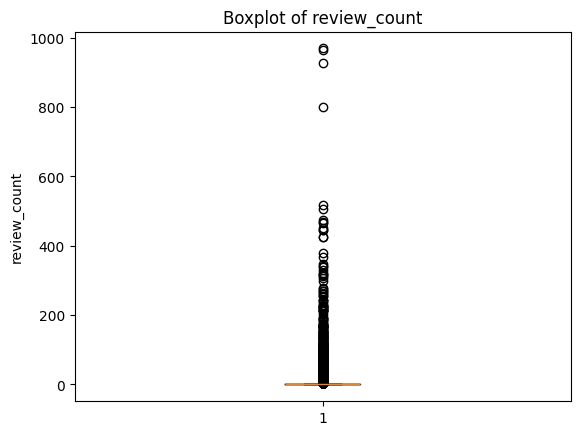

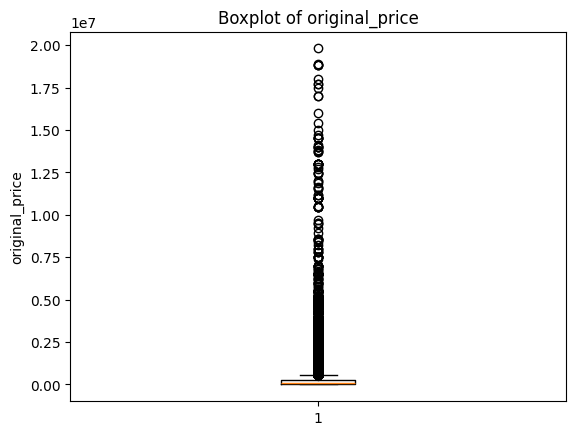

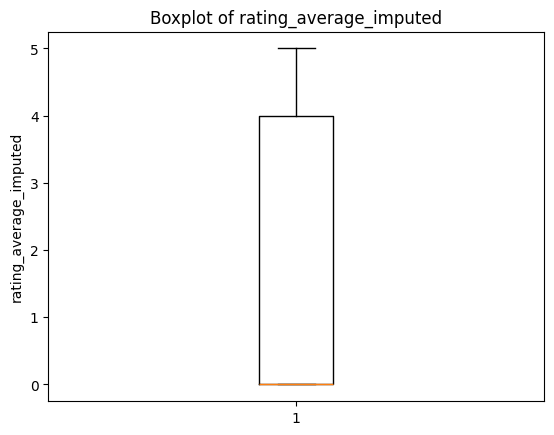

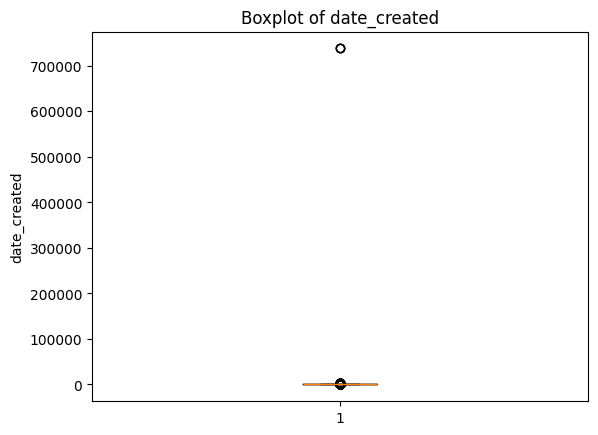

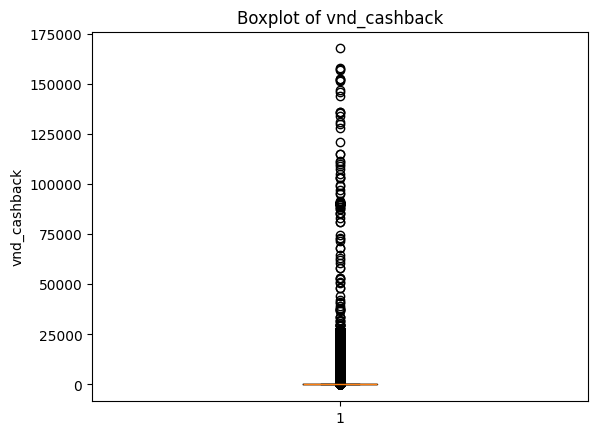

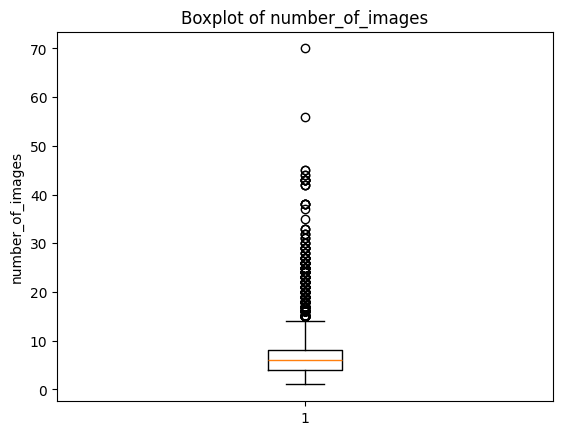

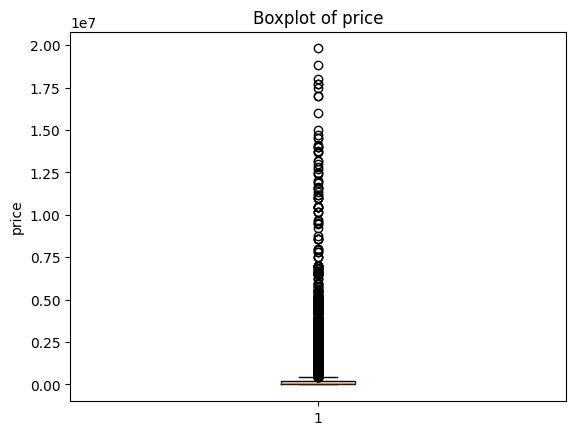

In [49]:
# Loop through columns in data_ohe
for col in num_cols:
    
    # Extract the numerical values of each column
    values = data_ohe.select(col).rdd.flatMap(lambda x: x).collect()
    
    # Plot the boxplot for the current column
    plt.figure()  # To create a new figure for each boxplot
    plt.boxplot(values)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()


In [50]:
from pyspark.sql import functions as F  # Import functions module

# Apply Winsorization to all numerical columns
for col in num_cols:
    lower_bound = data_ohe.approxQuantile(col, [0.01], 0.01)[0]
    upper_bound = data_ohe.approxQuantile(col, [0.99], 0.01)[0]
    
    # Add a new column for the winsorized values
    data_ohe = data_ohe.withColumn(
        f"{col}_winsorized", 
        F.when(F.col(col) < lower_bound, lower_bound)
        .when(F.col(col) > upper_bound, upper_bound)
        .otherwise(F.col(col))
    )


In [51]:
data_ohe.show(5)

+--------------------+--------------------+---------+--------------+------+----------------+-----+------------+--------------+---------+--------------------+------------+----------------+------------+---------+-------------------+-------------+----------------------+--------------+---------------------+-------------------------------+--------------------+------------------------+-----------------------------+------------------------+---------------------------+------------------------+-----------------+-----------------+----------------------+-----------------+--------------------+-----------------------+-------------------------+---------------------------------+-----------------------+-----------------------+---------------------------+----------------+
|         description|                name|       id|original_price| price|fulfillment_type|brand|review_count|rating_average|pay_later|      current_seller|date_created|number_of_images|vnd_cashback|has_video|       product_type|quan

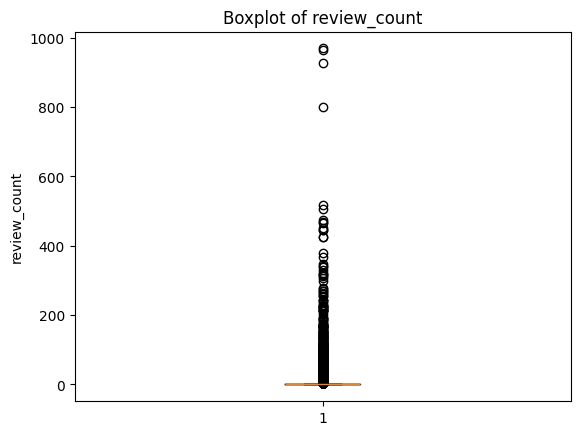

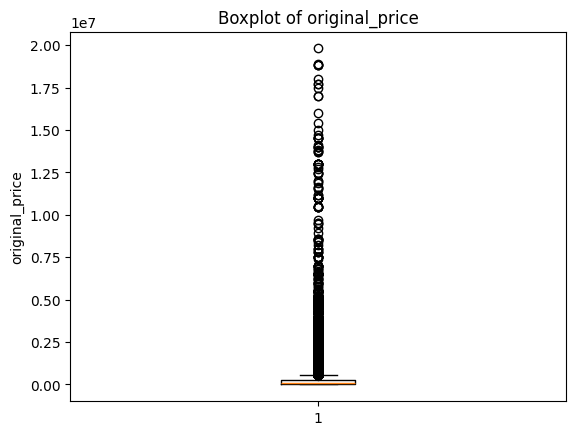

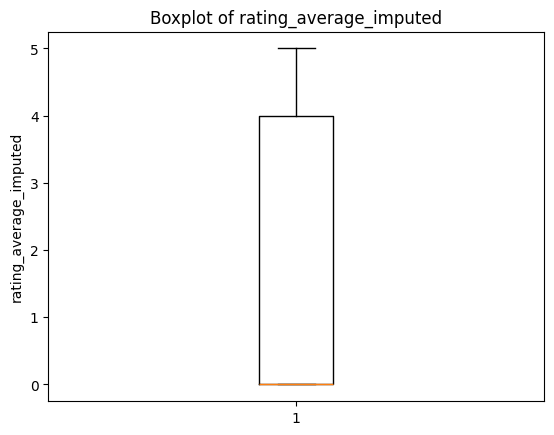

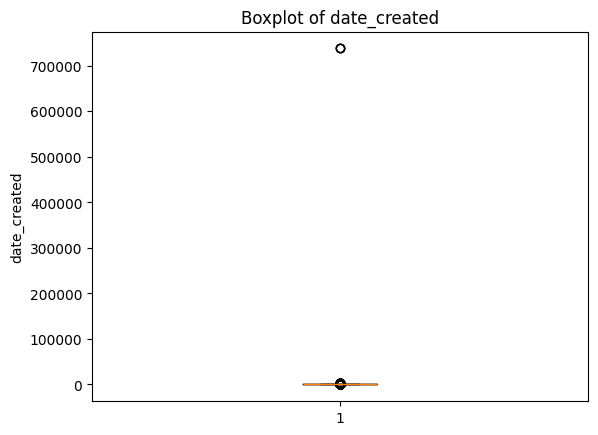

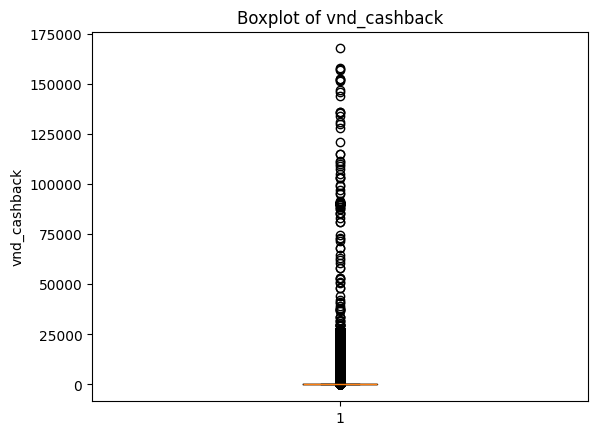

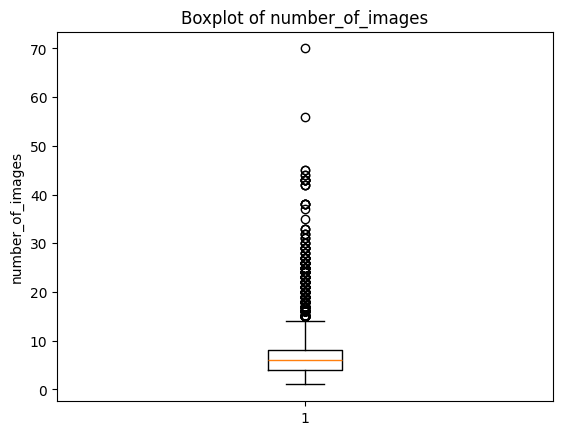

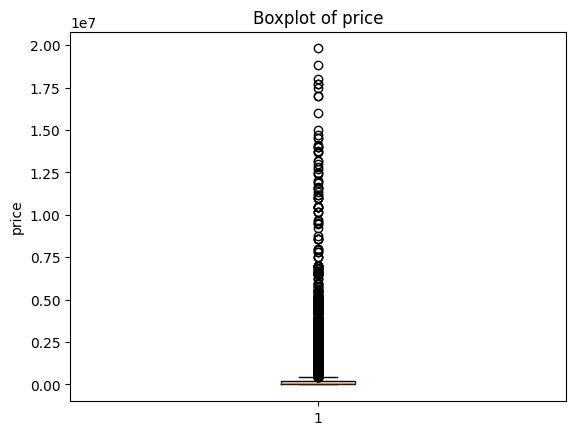

In [52]:
# Loop through columns in data_ohe
for col in num_cols:
    
    # Extract the numerical values of each column
    values = data_ohe.select(col).rdd.flatMap(lambda x: x).collect()
    
    # Plot the boxplot for the current column
    plt.figure()  # To create a new figure for each boxplot
    plt.boxplot(values)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

#### 3.3 Numerical Transformation

In [53]:
selected_data = data_ohe.select( "id", "name_frequency", "description_frequency", "original_price_winsorized", "price_winsorized", "fulfillment_type_one_hot", "brand_one_hot", "review_count_winsorized","rating_average_imputed_winsorized", "pay_later_one_hot", "current_seller_one_hot", "date_created_winsorized", "number_of_images_winsorized", "vnd_cashback_winsorized", "has_video_one_hot", "product_type_one_hot",  "quantity_sold")

In [54]:
num_cols={"original_price_winsorized", "price_winsorized", "review_count_winsorized", "rating_average_imputed_winsorized", "date_created_winsorized", "number_of_images_winsorized", "vnd_cashback_winsorized"}

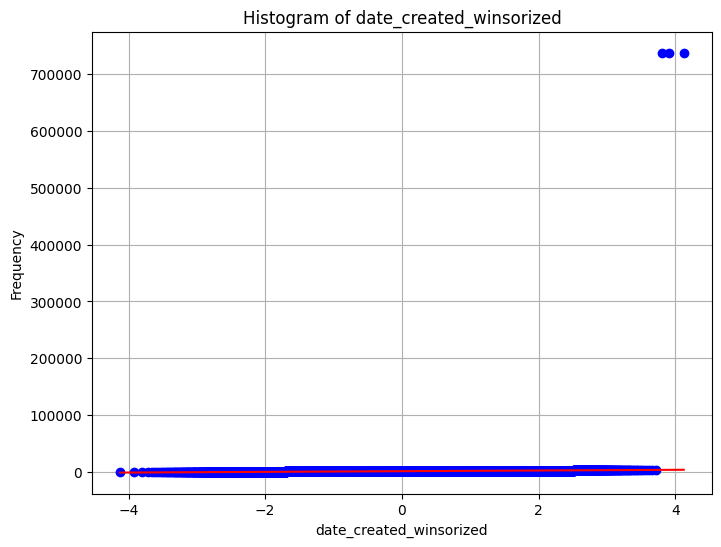

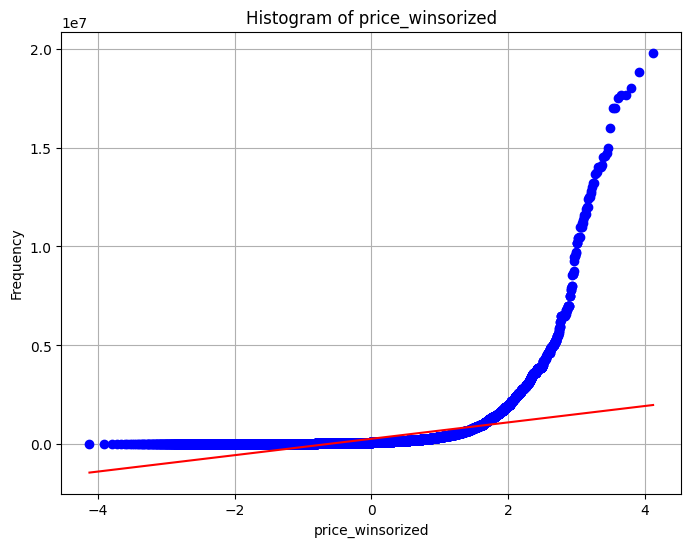

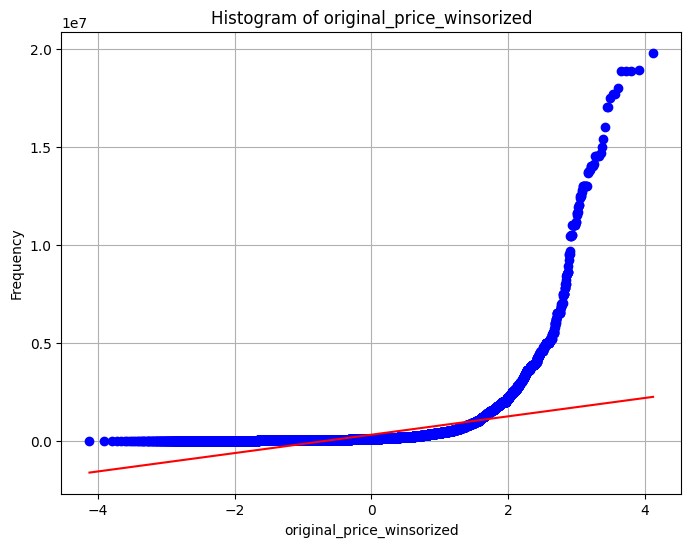

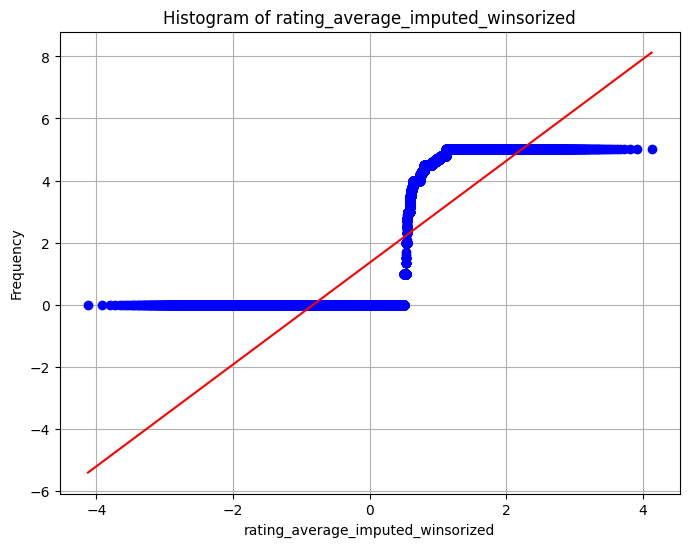

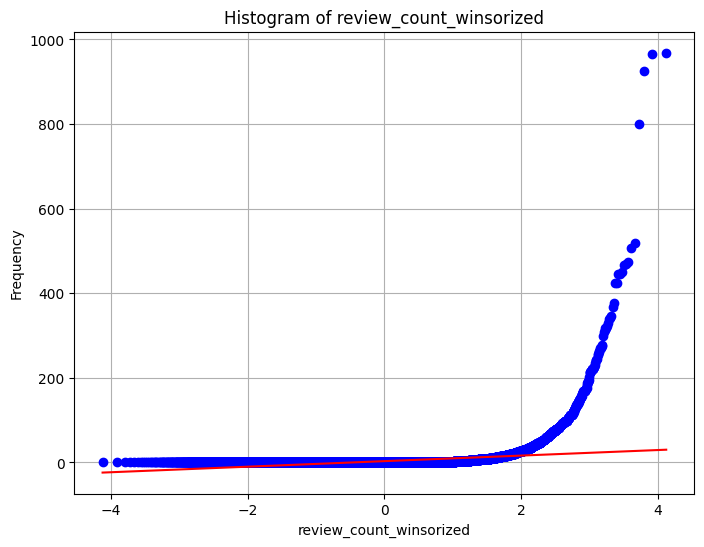

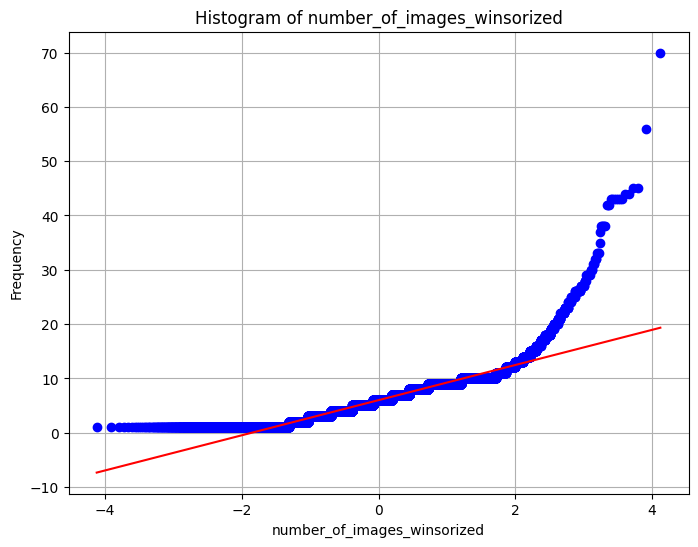

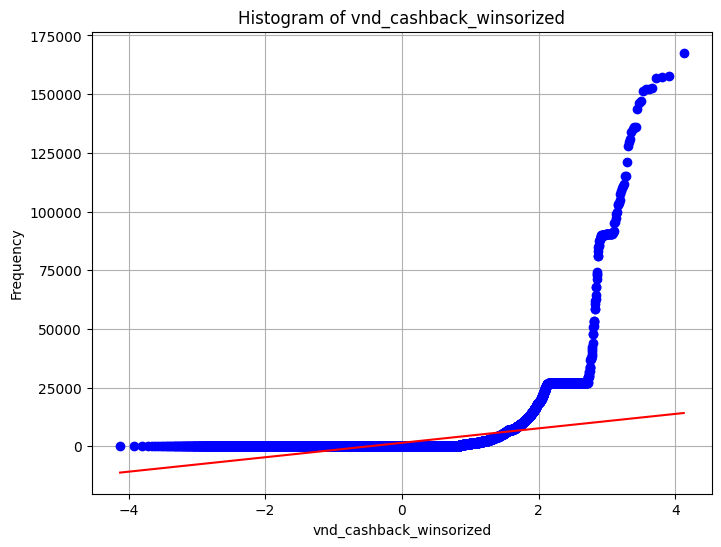

In [55]:
import numpy as np
import scipy.stats as stats

for col in num_cols:
    values = selected_data.select(col).rdd.flatMap(lambda x: x).collect()

    plt.figure(figsize=(8, 6))
    stats.probplot(values, dist='norm', plot=plt)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


#### Logarithim Transformation

from pyspark.sql.functions import log

for col in num_cols:

    selected_data = selected_data.withColumn(f"{col}_log", log(F.col(col)))

selected_data.show(5)

#### Yeo Johnson Transformation

from scipy.stats import yeojohnson

from pyspark.sql import functions as F


for col in num_cols:

    values = np.array(selected_data.select(col).rdd.flatMap(lambda x: x).collect())


    transformed, lambda_ = yeojohnson(values)


    selected_data = selected_data.withColumn(f"{col}_yeo", F.lit(float(transformed[0])))

selected_data.show(5)

#### 3.4 Train Test Split

In [56]:
selected_data = selected_data.select("id", "name_frequency", "description_frequency", "original_price_winsorized", "price_winsorized", "fulfillment_type_one_hot", "brand_one_hot", "review_count_winsorized", "rating_average_imputed_winsorized", "pay_later_one_hot", "current_seller_one_hot", "date_created_winsorized", "number_of_images_winsorized", "vnd_cashback_winsorized", "has_video_one_hot", "product_type_one_hot", "quantity_sold")

In [57]:
selected_data.show(5)

+---------+--------------+---------------------+-------------------------+----------------+------------------------+-----------------+-----------------------+---------------------------------+-----------------+----------------------+-----------------------+---------------------------+-----------------------+-----------------+--------------------+-------------+
|       id|name_frequency|description_frequency|original_price_winsorized|price_winsorized|fulfillment_type_one_hot|    brand_one_hot|review_count_winsorized|rating_average_imputed_winsorized|pay_later_one_hot|current_seller_one_hot|date_created_winsorized|number_of_images_winsorized|vnd_cashback_winsorized|has_video_one_hot|product_type_one_hot|quantity_sold|
+---------+--------------+---------------------+-------------------------+----------------+------------------------+-----------------+-----------------------+---------------------------------+-----------------+----------------------+-----------------------+-----------------

In [58]:
(train, test) = selected_data.randomSplit([0.8, 0.2], seed=100)

In [59]:
train1 = train.select("*")

In [60]:
test1 = test.select("*")

In [61]:
print(type(train))

<class 'pyspark.sql.dataframe.DataFrame'>


In [62]:
print((train.count(), len(train.columns)))

(29749, 17)


In [63]:
train.show(5)

+------+--------------+---------------------+-------------------------+----------------+------------------------+-----------------+-----------------------+---------------------------------+-----------------+----------------------+-----------------------+---------------------------+-----------------------+-----------------+--------------------+-------------+
|    id|name_frequency|description_frequency|original_price_winsorized|price_winsorized|fulfillment_type_one_hot|    brand_one_hot|review_count_winsorized|rating_average_imputed_winsorized|pay_later_one_hot|current_seller_one_hot|date_created_winsorized|number_of_images_winsorized|vnd_cashback_winsorized|has_video_one_hot|product_type_one_hot|quantity_sold|
+------+--------------+---------------------+-------------------------+----------------+------------------------+-----------------+-----------------------+---------------------------------+-----------------+----------------------+-----------------------+--------------------------

In [64]:
print(type(test))

<class 'pyspark.sql.dataframe.DataFrame'>


In [65]:
print((test.count(), len(test.columns)))

(7388, 17)


In [66]:
test.show(5)

+-------+--------------+---------------------+-------------------------+----------------+------------------------+-----------------+-----------------------+---------------------------------+-----------------+----------------------+-----------------------+---------------------------+-----------------------+-----------------+--------------------+-------------+
|     id|name_frequency|description_frequency|original_price_winsorized|price_winsorized|fulfillment_type_one_hot|    brand_one_hot|review_count_winsorized|rating_average_imputed_winsorized|pay_later_one_hot|current_seller_one_hot|date_created_winsorized|number_of_images_winsorized|vnd_cashback_winsorized|has_video_one_hot|product_type_one_hot|quantity_sold|
+-------+--------------+---------------------+-------------------------+----------------+------------------------+-----------------+-----------------------+---------------------------------+-----------------+----------------------+-----------------------+-----------------------

#### Vector Assembler

In [67]:
selected_data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name_frequency: long (nullable = true)
 |-- description_frequency: long (nullable = false)
 |-- original_price_winsorized: double (nullable = true)
 |-- price_winsorized: double (nullable = true)
 |-- fulfillment_type_one_hot: vector (nullable = true)
 |-- brand_one_hot: vector (nullable = true)
 |-- review_count_winsorized: double (nullable = true)
 |-- rating_average_imputed_winsorized: double (nullable = true)
 |-- pay_later_one_hot: vector (nullable = true)
 |-- current_seller_one_hot: vector (nullable = true)
 |-- date_created_winsorized: double (nullable = true)
 |-- number_of_images_winsorized: double (nullable = true)
 |-- vnd_cashback_winsorized: double (nullable = true)
 |-- has_video_one_hot: vector (nullable = true)
 |-- product_type_one_hot: vector (nullable = true)
 |-- quantity_sold: integer (nullable = true)



In [68]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=selected_data.columns[:-1],outputCol="Xcols")

In [69]:
train_vectored = featureassembler.transform(train)

In [70]:
train_vectored.show(5)

+------+--------------+---------------------+-------------------------+----------------+------------------------+-----------------+-----------------------+---------------------------------+-----------------+----------------------+-----------------------+---------------------------+-----------------------+-----------------+--------------------+-------------+--------------------+
|    id|name_frequency|description_frequency|original_price_winsorized|price_winsorized|fulfillment_type_one_hot|    brand_one_hot|review_count_winsorized|rating_average_imputed_winsorized|pay_later_one_hot|current_seller_one_hot|date_created_winsorized|number_of_images_winsorized|vnd_cashback_winsorized|has_video_one_hot|product_type_one_hot|quantity_sold|               Xcols|
+------+--------------+---------------------+-------------------------+----------------+------------------------+-----------------+-----------------------+---------------------------------+-----------------+----------------------+--------

24/12/14 23:51:44 WARN DAGScheduler: Broadcasting large task binary with size 1015.1 KiB


In [71]:
test_vectored = featureassembler.transform(test)

In [72]:
test_vectored.show(5)

+-------+--------------+---------------------+-------------------------+----------------+------------------------+-----------------+-----------------------+---------------------------------+-----------------+----------------------+-----------------------+---------------------------+-----------------------+-----------------+--------------------+-------------+--------------------+
|     id|name_frequency|description_frequency|original_price_winsorized|price_winsorized|fulfillment_type_one_hot|    brand_one_hot|review_count_winsorized|rating_average_imputed_winsorized|pay_later_one_hot|current_seller_one_hot|date_created_winsorized|number_of_images_winsorized|vnd_cashback_winsorized|has_video_one_hot|product_type_one_hot|quantity_sold|               Xcols|
+-------+--------------+---------------------+-------------------------+----------------+------------------------+-----------------+-----------------------+---------------------------------+-----------------+----------------------+-----

24/12/14 23:51:45 WARN DAGScheduler: Broadcasting large task binary with size 1015.1 KiB


#### Machine Learning Modelling

In [73]:
train_data = train_vectored.select("Xcols","quantity_sold")
train_data.show(10)

+--------------------+-------------+
|               Xcols|quantity_sold|
+--------------------+-------------+
|(4493,[0,1,2,3,4,...|           15|
|(4493,[0,1,2,3,4,...|            4|
|(4493,[0,1,2,3,4,...|           36|
|(4493,[0,1,2,3,4,...|         3626|
|(4493,[0,1,2,3,4,...|           86|
|(4493,[0,1,2,3,4,...|            6|
|(4493,[0,1,2,3,4,...|          317|
|(4493,[0,1,2,3,4,...|            0|
|(4493,[0,1,2,3,4,...|           30|
|(4493,[0,1,2,3,4,...|            1|
+--------------------+-------------+
only showing top 10 rows



In [74]:
test_data = test_vectored.select("Xcols","quantity_sold")
test_data.show(10) 

+--------------------+-------------+
|               Xcols|quantity_sold|
+--------------------+-------------+
|(4493,[0,1,2,3,4,...|           26|
|(4493,[0,1,2,3,4,...|            1|
|(4493,[0,1,2,3,4,...|            6|
|(4493,[0,1,2,3,4,...|          201|
|(4493,[0,1,2,3,4,...|           25|
|(4493,[0,1,2,3,4,...|            0|
|(4493,[0,1,2,3,4,...|           21|
|(4493,[0,1,2,3,4,...|          370|
|(4493,[0,1,2,3,4,...|            0|
|(4493,[0,1,2,3,4,...|            2|
+--------------------+-------------+
only showing top 10 rows



In [75]:
from pyspark.ml.regression import LinearRegression

regressor=LinearRegression(featuresCol="Xcols", labelCol='quantity_sold')
regressor=regressor.fit(train_data)

24/12/14 23:51:48 WARN DAGScheduler: Broadcasting large task binary with size 1021.3 KiB
24/12/14 23:51:49 WARN DAGScheduler: Broadcasting large task binary with size 1022.5 KiB
24/12/14 23:51:50 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/12/14 23:51:50 WARN DAGScheduler: Broadcasting large task binary with size 1021.8 KiB
24/12/14 23:51:50 WARN DAGScheduler: Broadcasting large task binary with size 1022.9 KiB
24/12/14 23:51:50 WARN DAGScheduler: Broadcasting large task binary with size 1021.8 KiB
24/12/14 23:51:50 WARN DAGScheduler: Broadcasting large task binary with size 1022.9 KiB
24/12/14 23:51:50 WARN DAGScheduler: Broadcasting large task binary with size 1021.8 KiB
24/12/14 23:51:50 WARN DAGScheduler: Broadcasting large task binary with size 1022.9 KiB
24/12/14 23:51:50 WARN DAGScheduler: Broadcasting large task binary with size 1021.8 KiB
24/12/14 23:51:50 WARN DAGScheduler: Broadcasting large task binary with size 1022.9 KiB
24/

In [76]:
type(regressor)

pyspark.ml.regression.LinearRegressionModel

In [77]:
# Coefficients
regressor.coefficients

DenseVector([-0.0, 0.0464, 0.0023, -0.0, 0.0, 4.7842, -17.7639, -1.6584, 3.9592, 0.7266, 3.9674, -11.1931, 3.2886, 51.0255, -2.5185, 2.0879, -35.9083, 6.1723, -12.2014, -4.9477, 3.3634, 9.3711, -3.4122, 8.5463, 0.5199, -5.2117, -5.163, 5.7644, 3.0399, 3.7521, 10.7118, 1.5512, 33.8768, 16.4671, -2.276, 17.3027, 3.7182, -32.6463, 2.7698, 16.5288, -5.2486, 17.0474, -9.0701, 13.8598, 14.1949, 10.3575, -10.9222, 0.5298, -176.4388, 2.7694, -7.6812, 6.0406, -0.1375, -6.0043, -75.5432, 4.5583, -9.7928, 12.8923, -41.8127, -5.322, -0.4061, 19.9932, 13.814, -4.0668, -18.7472, 16.7384, -4.1725, 45.381, 3.0749, -10.3773, 1.1086, -0.9475, 1.8611, 3.4902, -2.6603, -27.2663, 3.0785, -11.5892, 1.5273, 3.5224, 5.0711, -65.8272, 0.0624, 30.2675, -8.8481, 6.9869, -158.279, -1.9982, 9.7095, -98.9362, -23.5488, 6.5708, -7.7091, -37.7274, 4.5161, 0.6644, 4.8588, 5.2723, -2.4086, -15.0612, -28.2644, 2.7242, 5.6369, 7.193, 2.739, -22.9947, 0.3122, -99.7047, 9.3502, -196.9141, 2.208, -1.1983, 4.1336, 5.4543, -1

In [78]:
# Intercept
regressor.intercept

-7.270067007243522

In [79]:
# first row values of Xcols_sscaled
train_data.take(1)

[Row(Xcols=SparseVector(4493, {0: 570489.0, 1: 1.0, 2: 1.0, 3: 585000.0, 4: 585000.0, 5: 1.0, 146: 1.0, 793: 3.0, 794: 5.0, 1357: 1.0, 4485: 5.0, 4487: 1.0, 4492: 1.0}), quantity_sold=15)]

In [80]:
train_pred_results=regressor.evaluate(train_data)

24/12/14 23:51:58 WARN DAGScheduler: Broadcasting large task binary with size 1043.2 KiB
24/12/14 23:51:58 WARN DAGScheduler: Broadcasting large task binary with size 1044.3 KiB


In [81]:
train_pred_results.predictions.show()

+--------------------+-------------+-------------------+
|               Xcols|quantity_sold|         prediction|
+--------------------+-------------+-------------------+
|(4493,[0,1,2,3,4,...|           15| 15.826552992025906|
|(4493,[0,1,2,3,4,...|            4| 2.9587302065746925|
|(4493,[0,1,2,3,4,...|           36|-0.5676073440418321|
|(4493,[0,1,2,3,4,...|         3626| 1506.1791887433155|
|(4493,[0,1,2,3,4,...|           86|  65.91197434988904|
|(4493,[0,1,2,3,4,...|            6|  8.479219524954969|
|(4493,[0,1,2,3,4,...|          317|   569.546575568716|
|(4493,[0,1,2,3,4,...|            0|   5.44155929316441|
|(4493,[0,1,2,3,4,...|           30| 17.192470317125625|
|(4493,[0,1,2,3,4,...|            1|  10.20681300666126|
|(4493,[0,1,2,3,4,...|            2| 2.6375334213460757|
|(4493,[0,1,2,3,4,...|           16|  9.919862629036547|
|(4493,[0,1,2,3,4,...|          243| 147.05291757284303|
|(4493,[0,1,2,3,4,...|          150|  80.62629598048098|
|(4493,[0,1,2,3,4,...|         

24/12/14 23:51:59 WARN DAGScheduler: Broadcasting large task binary with size 1037.0 KiB


In [82]:
test_pred_results=regressor.evaluate(test_data)

24/12/14 23:52:00 WARN DAGScheduler: Broadcasting large task binary with size 1043.2 KiB
24/12/14 23:52:00 WARN DAGScheduler: Broadcasting large task binary with size 1044.3 KiB


In [83]:
test_pred_results.predictions.show()

+--------------------+-------------+-------------------+
|               Xcols|quantity_sold|         prediction|
+--------------------+-------------+-------------------+
|(4493,[0,1,2,3,4,...|           26| 459.17696746465975|
|(4493,[0,1,2,3,4,...|            1|  4.708185692188479|
|(4493,[0,1,2,3,4,...|            6| -13.24031690665017|
|(4493,[0,1,2,3,4,...|          201| 134.57851591914348|
|(4493,[0,1,2,3,4,...|           25|  74.54125169225506|
|(4493,[0,1,2,3,4,...|            0|  8.427309958847236|
|(4493,[0,1,2,3,4,...|           21| 27.632226053348997|
|(4493,[0,1,2,3,4,...|          370| 217.91812885083706|
|(4493,[0,1,2,3,4,...|            0|   9.89980630852665|
|(4493,[0,1,2,3,4,...|            2|  10.57586422464465|
|(4493,[0,1,2,3,4,...|            0| -8.546077446846661|
|(4493,[0,1,2,3,4,...|            0|  7.826089649044153|
|(4493,[0,1,2,3,4,...|           23| 24.703445981584554|
|(4493,[0,1,2,3,4,...|           38| 22.559327128825284|
|(4493,[0,1,2,3,4,...|         

24/12/14 23:52:01 WARN DAGScheduler: Broadcasting large task binary with size 1037.0 KiB


In [84]:
train_pred_results.meanAbsoluteError, train_pred_results.meanSquaredError, train_pred_results.r2

(15.326287283703783, 17704.31156550115, 0.4428142602717783)

In [85]:
test_pred_results.meanAbsoluteError, test_pred_results.meanSquaredError, test_pred_results.r2

(16.99733911158596, 5762.067987895882, 0.5423534668670178)

In [86]:
print(f"Train:")
print(f"Data for MAE: {train_pred_results.meanAbsoluteError}")
print(f"Data for MSE: {train_pred_results.meanSquaredError}")
print(f"Data for R^2: {train_pred_results.r2}")
print(f"-----------------------------------")
print(f"Test:")
print(f"Data for MAE: {test_pred_results.meanAbsoluteError}")
print(f"Data for MSE: {test_pred_results.meanSquaredError}")
print(f"Data for R^2: {test_pred_results.r2}")

Train:
Data for MAE: 15.326287283703783
Data for MSE: 17704.31156550115
Data for R^2: 0.4428142602717783
-----------------------------------
Test:
Data for MAE: 16.99733911158596
Data for MSE: 5762.067987895882
Data for R^2: 0.5423534668670178


#### 3.5 Normalization and Scaling

In [87]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, Normalizer
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import col, mean, pow, lit

#### Lasso 

#### Define the feature assembler
featureassembler = VectorAssembler(inputCols=train_data.columns[:-1], outputCol="Xcols_Lasso")

Lasso_train = featureassembler.transform(train_data)

Lasso_test = featureassembler.transform(test_data)

#### Scale the features

scaler = StandardScaler(inputCol="Xcols_Lasso", outputCol="Xcols_sscaled")

scaler_model = scaler.fit(Lasso_train)

Lasso_train = scaler_model.transform(Lasso_train)

Lasso_test = scaler_model.transform(Lasso_test)


Lasso_train = Lasso_train.select("Xcols_sscaled","quantity_sold")
Lasso_train.show(5)

Lasso_test = Lasso_test.select("Xcols_sscaled","quantity_sold")
Lasso_test.show(5)

#### Define Lasso Regression (Linear Regression with regularization)

lasso = LinearRegression(featuresCol="Xcols_sccaled", labelCol="quantity_sold", regParam=0.2, elasticNetParam=1.0)

#### Normalization

In [88]:
# Assuming 'Xcols' contains the assembled features
normalizer = Normalizer(inputCol="Xcols", outputCol="Xcols_normalize", p=1) 
train_normalized = normalizer.transform(train_data)
test_normalized = normalizer.transform(test_data)

In [89]:
train_predictions = train_normalized.select("Xcols_normalize", "quantity_sold")
train_predictions.show(10)

+--------------------+-------------+
|     Xcols_normalize|quantity_sold|
+--------------------+-------------+
|(4493,[0,1,2,3,4,...|           15|
|(4493,[0,1,2,3,4,...|            4|
|(4493,[0,1,2,3,4,...|           36|
|(4493,[0,1,2,3,4,...|         3626|
|(4493,[0,1,2,3,4,...|           86|
|(4493,[0,1,2,3,4,...|            6|
|(4493,[0,1,2,3,4,...|          317|
|(4493,[0,1,2,3,4,...|            0|
|(4493,[0,1,2,3,4,...|           30|
|(4493,[0,1,2,3,4,...|            1|
+--------------------+-------------+
only showing top 10 rows



In [90]:
test_predictions = test_normalized.select("Xcols_normalize", "quantity_sold")
test_predictions.show(10)

+--------------------+-------------+
|     Xcols_normalize|quantity_sold|
+--------------------+-------------+
|(4493,[0,1,2,3,4,...|           26|
|(4493,[0,1,2,3,4,...|            1|
|(4493,[0,1,2,3,4,...|            6|
|(4493,[0,1,2,3,4,...|          201|
|(4493,[0,1,2,3,4,...|           25|
|(4493,[0,1,2,3,4,...|            0|
|(4493,[0,1,2,3,4,...|           21|
|(4493,[0,1,2,3,4,...|          370|
|(4493,[0,1,2,3,4,...|            0|
|(4493,[0,1,2,3,4,...|            2|
+--------------------+-------------+
only showing top 10 rows



#### Machine Learning Modelling

In [91]:
from pyspark.ml.regression import LinearRegression

regressor=LinearRegression(featuresCol="Xcols_normalize", labelCol='quantity_sold')
regressor=regressor.fit(train_predictions)

24/12/14 23:52:04 WARN DAGScheduler: Broadcasting large task binary with size 1026.3 KiB
24/12/14 23:52:05 WARN DAGScheduler: Broadcasting large task binary with size 1027.6 KiB
24/12/14 23:52:05 WARN DAGScheduler: Broadcasting large task binary with size 1026.8 KiB
24/12/14 23:52:05 WARN DAGScheduler: Broadcasting large task binary with size 1028.0 KiB
24/12/14 23:52:05 WARN DAGScheduler: Broadcasting large task binary with size 1026.8 KiB
24/12/14 23:52:05 WARN DAGScheduler: Broadcasting large task binary with size 1028.0 KiB
24/12/14 23:52:05 WARN DAGScheduler: Broadcasting large task binary with size 1026.8 KiB
24/12/14 23:52:05 WARN DAGScheduler: Broadcasting large task binary with size 1028.0 KiB
24/12/14 23:52:05 WARN DAGScheduler: Broadcasting large task binary with size 1026.8 KiB
24/12/14 23:52:05 WARN DAGScheduler: Broadcasting large task binary with size 1028.0 KiB
24/12/14 23:52:05 WARN DAGScheduler: Broadcasting large task binary with size 1026.8 KiB
24/12/14 23:52:05 WAR

In [92]:
type(regressor)

pyspark.ml.regression.LinearRegressionModel

In [93]:
# Coefficients
regressor.coefficients

DenseVector([-22.0622, 122058565.7763, 422036.4384, 230.2867, -182.027, 48266224.0816, 1141761207.795, 373249905.5244, 450288961.5296, 25965560.445, 799405758.0294, 1162161488.8906, 379032572.3542, 14650183002.1626, -792816632.6994, -6655621.6257, -1218409895.441, 538783952.6604, 462635645.4218, -285699384.2719, -894759280.9693, 11773478416.5456, 3567632499.1259, -702623816.7116, 319759361.0601, -1819486.7412, -205159336.2962, -1032979541.6776, -919270963.0917, 572142201.4883, 146577489.6713, 456936873.1052, -401369641.4347, 107752296.2496, -365004569.9543, -184413051.143, 682223326.1121, -371790141.6968, -117541182.1091, 95138066.427, -40121809.3427, -1690934303.4057, 720202931.5495, -598476309.6513, -996255889.1245, 49132857.4274, 1492095923.2079, -585112135.5431, -822156648.5595, -1483898165.6326, 1154248143.7048, -143872431.2475, -202110065.3933, -277307131.6895, 5491548531.4834, -956675321.4664, 573458108.2256, -95382336.3826, -23786200244.5861, 1366428465.6428, 536565493.0901, -1

In [94]:
# Intercept
regressor.intercept

32.202910004574164

In [95]:
# first row values of Xcols_sscaled
train_data.take(1)

[Row(Xcols=SparseVector(4493, {0: 570489.0, 1: 1.0, 2: 1.0, 3: 585000.0, 4: 585000.0, 5: 1.0, 146: 1.0, 793: 3.0, 794: 5.0, 1357: 1.0, 4485: 5.0, 4487: 1.0, 4492: 1.0}), quantity_sold=15)]

In [96]:
train_pred_results=regressor.evaluate(train_predictions)

24/12/14 23:52:17 WARN DAGScheduler: Broadcasting large task binary with size 1048.2 KiB
24/12/14 23:52:17 WARN DAGScheduler: Broadcasting large task binary with size 1049.3 KiB


In [97]:
train_pred_results.predictions.show()

+--------------------+-------------+-------------------+
|     Xcols_normalize|quantity_sold|         prediction|
+--------------------+-------------+-------------------+
|(4493,[0,1,2,3,4,...|           15|  4.580887741764343|
|(4493,[0,1,2,3,4,...|            4|-25.687713056602604|
|(4493,[0,1,2,3,4,...|           36|  35.26638962807374|
|(4493,[0,1,2,3,4,...|         3626|  4589.606662778561|
|(4493,[0,1,2,3,4,...|           86|  86.06470409785257|
|(4493,[0,1,2,3,4,...|            6|-125.12634545256373|
|(4493,[0,1,2,3,4,...|          317| 405.49399858323915|
|(4493,[0,1,2,3,4,...|            0| 0.1813998284109033|
|(4493,[0,1,2,3,4,...|           30|  66.73361846418885|
|(4493,[0,1,2,3,4,...|            1|   0.40751058605602|
|(4493,[0,1,2,3,4,...|            2|-11.036593456252092|
|(4493,[0,1,2,3,4,...|           16| -6.209439505607747|
|(4493,[0,1,2,3,4,...|          243| 238.91337549733106|
|(4493,[0,1,2,3,4,...|          150|  123.7658084716623|
|(4493,[0,1,2,3,4,...|         

24/12/14 23:52:18 WARN DAGScheduler: Broadcasting large task binary with size 1045.1 KiB


In [98]:
test_pred_results=regressor.evaluate(test_predictions)

24/12/14 23:52:19 WARN DAGScheduler: Broadcasting large task binary with size 1048.2 KiB
24/12/14 23:52:19 WARN DAGScheduler: Broadcasting large task binary with size 1049.3 KiB


In [99]:
test_pred_results.predictions.show()

+--------------------+-------------+-------------------+
|     Xcols_normalize|quantity_sold|         prediction|
+--------------------+-------------+-------------------+
|(4493,[0,1,2,3,4,...|           26|  228.7293102768288|
|(4493,[0,1,2,3,4,...|            1|  45.63468553386356|
|(4493,[0,1,2,3,4,...|            6| -238.3590631828106|
|(4493,[0,1,2,3,4,...|          201| 228.87599449462894|
|(4493,[0,1,2,3,4,...|           25| 116.73668157221613|
|(4493,[0,1,2,3,4,...|            0| -3.666410871753527|
|(4493,[0,1,2,3,4,...|           21| 377.06303052319214|
|(4493,[0,1,2,3,4,...|          370| 383.78869748379896|
|(4493,[0,1,2,3,4,...|            0| -5.875695175592796|
|(4493,[0,1,2,3,4,...|            2|  80.89825845929683|
|(4493,[0,1,2,3,4,...|            0|  -89.3632020689846|
|(4493,[0,1,2,3,4,...|            0|-15.731353739614939|
|(4493,[0,1,2,3,4,...|           23|  43.33449708023789|
|(4493,[0,1,2,3,4,...|           38|  41.27331475623844|
|(4493,[0,1,2,3,4,...|         

24/12/14 23:52:20 WARN DAGScheduler: Broadcasting large task binary with size 1045.1 KiB


In [100]:
train_pred_results.meanAbsoluteError, train_pred_results.meanSquaredError, train_pred_results.r2

(14.621464504566926, 5505.5742086887585, 0.8267299224402216)

In [101]:
test_pred_results.meanAbsoluteError, test_pred_results.meanSquaredError, test_pred_results.r2

(18.746876255839116, 6777.848648368017, 0.4616760957104934)

In [102]:
print(f"Train:")
print(f"Data for MAE: {train_pred_results.meanAbsoluteError}")
print(f"Data for MSE: {train_pred_results.meanSquaredError}")
print(f"Data for R^2: {train_pred_results.r2}")
print(f"-----------------------------------")
print(f"Test:")
print(f"Data for MAE: {test_pred_results.meanAbsoluteError}")
print(f"Data for MSE: {test_pred_results.meanSquaredError}")
print(f"Data for R^2: {test_pred_results.r2}")

Train:
Data for MAE: 14.621464504566926
Data for MSE: 5505.5742086887585
Data for R^2: 0.8267299224402216
-----------------------------------
Test:
Data for MAE: 18.746876255839116
Data for MSE: 6777.848648368017
Data for R^2: 0.4616760957104934


### Step 4: Machine Learning Modelling

In [103]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, Normalizer
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

categorical_one_hot_columns = [
    "brand_one_hot", "fulfillment_type_one_hot", "pay_later_one_hot",
    "has_video_one_hot", "product_type_one_hot", "current_seller_one_hot"
]
frequency_columns = ["name_frequency", "description_frequency"]
numerical_columns = ["rating_average_imputed_winsorized"]

input_columns = categorical_one_hot_columns + frequency_columns + numerical_columns

assembler = VectorAssembler(inputCols=input_columns, outputCol="features_vector")

normalizer = Normalizer(inputCol="features_vector", outputCol="normalized_features", p=2)

# Create the pipeline with assembler and normalizer
pipeline = Pipeline(stages=[assembler, normalizer])

# Fit the pipeline model
pipeline_model = pipeline.fit(train1)

# Transform the data
train1_transformed = pipeline_model.transform(train1)
test1_transformed = pipeline_model.transform(test1)

# Initialize the Linear Regression model
lr = LinearRegression(featuresCol="normalized_features", labelCol="quantity_sold")

# Train the model
lr_model = lr.fit(train1_transformed)

# Make predictions
train1_predictions = lr_model.transform(train1_transformed)
test1_predictions = lr_model.transform(test1_transformed)

# Initialize the evaluators
evaluator_mae = RegressionEvaluator(labelCol="quantity_sold", predictionCol="prediction", metricName="mae")
evaluator_rmse = RegressionEvaluator(labelCol="quantity_sold", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="quantity_sold", predictionCol="prediction", metricName="r2")

# Evaluate the model on training data
train1_mae = evaluator_mae.evaluate(train1_predictions)
train1_rmse = evaluator_rmse.evaluate(train1_predictions)
train1_r2 = evaluator_r2.evaluate(train1_predictions)

# Evaluate the model on test data
test1_mae = evaluator_mae.evaluate(test1_predictions)
test1_rmse = evaluator_rmse.evaluate(test1_predictions)
test1_r2 = evaluator_r2.evaluate(test1_predictions)


24/12/14 23:52:21 WARN DAGScheduler: Broadcasting large task binary with size 1037.1 KiB
24/12/14 23:52:21 WARN DAGScheduler: Broadcasting large task binary with size 1038.3 KiB
24/12/14 23:52:21 WARN DAGScheduler: Broadcasting large task binary with size 1037.6 KiB
24/12/14 23:52:22 WARN DAGScheduler: Broadcasting large task binary with size 1038.8 KiB
24/12/14 23:52:22 WARN DAGScheduler: Broadcasting large task binary with size 1037.6 KiB
24/12/14 23:52:22 WARN DAGScheduler: Broadcasting large task binary with size 1038.8 KiB
24/12/14 23:52:22 WARN DAGScheduler: Broadcasting large task binary with size 1037.6 KiB
24/12/14 23:52:22 WARN DAGScheduler: Broadcasting large task binary with size 1038.8 KiB
24/12/14 23:52:22 WARN DAGScheduler: Broadcasting large task binary with size 1037.6 KiB
24/12/14 23:52:22 WARN DAGScheduler: Broadcasting large task binary with size 1038.8 KiB
24/12/14 23:52:22 WARN DAGScheduler: Broadcasting large task binary with size 1037.6 KiB
24/12/14 23:52:22 WAR

In [104]:
print(f"Train:")
print(f"Data for MAE: {train1_mae}")
print(f"Data for MSE: {train1_rmse}")
print(f"Data for R^2: {train1_r2}")
print(f"-----------------------------------")
print(f"Test:")
print(f"Data for MAE: {test1_mae}")
print(f"Data for MSE: {test1_rmse}")
print(f"Data for R^2: {test1_r2}")

Train:
Data for MAE: 21.564145520208406
Data for MSE: 165.77193384952918
Data for R^2: 0.1351456846987913
-----------------------------------
Test:
Data for MAE: 27.538825578472537
Data for MSE: 302.55133351404606
Data for R^2: -6.270259981715542


### Step 5: Model Evaluation and Selection

- Review and tune any previous steps
- Justify selection and illustrate comparison between different models before confirming the final model choice

#### Decision Tree Classifier

In [105]:
from pyspark.ml.regression import DecisionTreeRegressor

# Use DecisionTreeRegressor instead of classifier
dtc = DecisionTreeRegressor(featuresCol="Xcols_normalize", labelCol="quantity_sold")
dtc = dtc.fit(train_predictions)

24/12/14 23:52:35 WARN DAGScheduler: Broadcasting large task binary with size 1023.4 KiB
24/12/14 23:52:35 WARN DAGScheduler: Broadcasting large task binary with size 1023.5 KiB
24/12/14 23:52:35 WARN DAGScheduler: Broadcasting large task binary with size 1072.1 KiB
24/12/14 23:52:36 WARN DAGScheduler: Broadcasting large task binary with size 1191.8 KiB
24/12/14 23:52:37 WARN MemoryStore: Not enough space to cache rdd_4449_7 in memory! (computed 37.9 MiB so far)
24/12/14 23:52:37 WARN MemoryStore: Not enough space to cache rdd_4449_5 in memory! (computed 37.9 MiB so far)
24/12/14 23:52:37 WARN MemoryStore: Not enough space to cache rdd_4449_0 in memory! (computed 37.9 MiB so far)
24/12/14 23:52:37 WARN MemoryStore: Not enough space to cache rdd_4449_3 in memory! (computed 37.9 MiB so far)
24/12/14 23:52:37 WARN MemoryStore: Not enough space to cache rdd_4449_10 in memory! (computed 37.9 MiB so far)
24/12/14 23:52:37 WARN MemoryStore: Not enough space to cache rdd_4449_2 in memory! (com

In [106]:
pred = dtc.transform(test_predictions)
pred.show(3)

+--------------------+-------------+------------------+
|     Xcols_normalize|quantity_sold|        prediction|
+--------------------+-------------+------------------+
|(4493,[0,1,2,3,4,...|           26|1725.2857142857142|
|(4493,[0,1,2,3,4,...|            1| 35.16368286445013|
|(4493,[0,1,2,3,4,...|            6|1.9014827018121911|
+--------------------+-------------+------------------+
only showing top 3 rows



24/12/14 23:52:40 WARN DAGScheduler: Broadcasting large task binary with size 1014.0 KiB


#### Metrics- Classification Model

In [107]:
from pyspark.ml.evaluation import RegressionEvaluator

# Create a RegressionEvaluator
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="quantity_sold", metricName="rmse")

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = evaluator.evaluate(pred)
print("Root Mean Squared Error (RMSE):", rmse)

# You can also evaluate using other metrics like MAE or R2
mae_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="quantity_sold", metricName="mae")
mae = mae_evaluator.evaluate(pred)
print("Mean Absolute Error (MAE):", mae)

r2_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="quantity_sold", metricName="r2")
r2 = r2_evaluator.evaluate(pred)
print("R-squared:", r2)


24/12/14 23:52:40 WARN DAGScheduler: Broadcasting large task binary with size 1017.3 KiB
24/12/14 23:52:41 WARN DAGScheduler: Broadcasting large task binary with size 1018.4 KiB


Root Mean Squared Error (RMSE): 89.71729975726691


24/12/14 23:52:41 WARN DAGScheduler: Broadcasting large task binary with size 1017.3 KiB
24/12/14 23:52:42 WARN DAGScheduler: Broadcasting large task binary with size 1018.4 KiB


Mean Absolute Error (MAE): 14.742225548397148


24/12/14 23:52:42 WARN DAGScheduler: Broadcasting large task binary with size 1017.3 KiB
24/12/14 23:52:42 WARN DAGScheduler: Broadcasting large task binary with size 1018.4 KiB


R-squared: 0.36070076238537285


### Step 6: Report

•	Problem Statement Formulation
Data Exploration:
During the exploration, the dataset has a total of 44,804 rows and 18 columns in total. By checking the total count of rows of each individual variable, rating_average has a total of 44,974 rows which indicates there are null values. 

By using a for loop, we can see the count of each unique category per variable. However, favourite_count has only one unique category. It does not have any informative textual values and indicates its irrelevance to the target variable ‘quantity_sold’.

Problem Statement:
The main task of this project is to predict the quantity sold of a product. By developing a PySpark machine learning model, we are able to analyse the business performance based on the quantity sold of the different products offering. We can utilise the information to optimize inventory management. 

•	Exploratory Data Analysis and Data Cleaning
Grouping and Filtering:
Through grouping and filtering, I am able to explore popularity of product type affecting inventory management. We can see through the average rating per product type, women shoes are the most popular at 1.64. It has sold a total of 153,051 quantities. Additionally, it is the second most popular product type sold across sellers at 7086. 

Drop Unnecessary Columns:
As said previously, favourite_count has the same value across all rows, indicating there is no variation. Since it does not provide any valuable information or help differentiate between observation, it doesn’t have predictive power and will not contribute to the model’s performance.

Missing Value Treatment:
Rating_average has 10 rows with missing values. I decided to use mean imputation to ensure that no information is lost. It also ensures that the central tendency is constant. By creating a new column rating_average_imputed, we can see if the missing values have been replaced.

While using mode and median imputation, the scores performed significantly poorer. The test r^2 for mean imputation is 0.36147, median imputation is 0.36146 and mode imputation is 0.36146. The score was collected after doing missing imputation, categorical data encoding and vector transformation only.

Column Creation:
I created a column discounted to see if the product has been given a discount and if it affected the number of quantities sold. However, the model performed worse after it was created. The final test model for r^2 without discounted is 0.4616, with discounted the r^2 results is 0.3491.

•	Data Wrangling and Transformation
Categorical Data Encoding:
I used frequency encoder on name and description due to its high cardinality. It reduces the dimension of the dataset. This helps the model to reduce its overfitting. 

If one hot encoding was done, the test R^2 would decrease from 0.3614 to 0.3431. Additionally, the model scores would be overfitting.
Train: 
MAE: 0.107
MSE: 1.631
R^2: 0.999

Test:
MAE: 13.2029
MSE: 4745.3900
R^2: 0.3431

The other categorical columns were done using one hot encoding to preserve the unique values of each category in each variable. It also offers clear binary features, making it easy to see how each categories affect the prediction score.

Numerical Data Transformation:

I have tried to use logarithmic transformation. However, as certain values in each variable are small, the values would be null. Thus, the model would not be able to proceed as it does not accept null values. Yeo Johnson was also performed. However, the test model R^2 had significantly decreased from 0.3614 to -0.263. Showing that the model is performing worse, and the chosen transformation is a poor fit for the data. The model does not explain much of the variance.

Vector assembler was done to combine the multiple columns into a single vector column. This is useful for combining features generated by different feature transformer into a single feature vector in order to train the logistic machine learning model.

Feature Scaling:
I have tried performing lasso and normalization to reduce the overfitting in the data. However, normalization have better performance and ensures that all the features are on the same scale as the dataset have varying units.  Despite the overall model performance has decreased, I felt that the differences between the train and test have significantly decreased.

•	Machine Learning Modelling
The model was made based on the previous transformation done like frequency and one hot encoded columns, missing imputation columns and normalizing due to overfitting. 

•	Model Evaluation and Selection
Further evaluation made like creation of columns and dropping columns were decided based on the model. To evaluate if the created column discounted have improved the prediction score, the column has decreased the performance.

Dropping unnecessary columns like id, name and description were tried as well. However, due to the decrease in performance and the differences between train and test model increased. I choose not to do so as overfitting would cause an issue.

•	Summarize Findings:
Through correlation analysis, I noticed that review_count have the highest correlation to quantity sold at 0.603. However, the other variables do not have a high correlation with results around 0.001. Additional improvements that could be made were more graphs to showcase the distribution of various variables during the data exploration, creation of columns to see the interaction of different variables could have improved the model and further unnecessary columns could be dropped to see if the model would improve. Due to the final model, overfitting could still be seen, PCA could have been done as well to reduce it.
